<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;"> NEURAL NETWORK'S Project for Texas University
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Previus Run - Imports Data, Libraries and functions for analysis

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Libraries
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

import statsmodels.api as sm

import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats as stats
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

import multiprocessing
from itertools import product

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

#pip install graphviz
#conda install -c conda-forge mlxtend

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist 

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster import hierarchy

import matplotlib.cm as cm


import tensorflow as tf
import tensorflow.keras.layers as L



Bad key "text.kerning_factor" on line 4 in
C:\Users\11388\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


INFO:tensorflow:Using local port 22907
INFO:tensorflow:Using local port 23675
INFO:tensorflow:Using local port 17869
INFO:tensorflow:Using local port 24368
INFO:tensorflow:Using local port 19365
INFO:tensorflow:Using local port 15206
INFO:tensorflow:Using local port 17639
INFO:tensorflow:Using local port 23179
INFO:tensorflow:Using local port 18017
INFO:tensorflow:Using local port 22503


### Data

In [3]:
#Import Dataset
original_dataset = pd.read_csv("bank.csv")  # data as it is - to check consistency
data = pd.read_csv("bank.csv") # data to be manipulated

In [4]:
#Check import consistency
data.shape
#Review: Import Validated 660 regs and 7 information collumns

(10000, 14)

In [5]:
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2,"134,603.88",1,1,1,"71,725.73",0


### 1 - Exploratory Data Engineering

In [6]:
#RESET DATA
data = original_dataset.copy()

In [7]:
# Find unique Information for each customer, as Customerid, rowid, etc.
data.nunique()

#RowNumber and CustomerId are Unique as it have 10k unique information on 10k rows.      

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#Remove RowNumber and CustomerId
data= data[data.columns[3:]]

In [9]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#4682B4;"> TARGET VARIABLE: "EXITED" AS CHURN IS A MEASURE OF CUSTOMER'S ABANDONMENT RATE

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# MOVE DUMMIES VARIABLES TO COLUMNS

data = pd.get_dummies(data, columns=['Geography','Gender'])

In [11]:
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,1,0


In [12]:
data.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [13]:
# splitting data into training and test set for independent attributes

features = [col for col in data.columns if col != 'Exited']

X_train, X_test, y_train, y_test = train_test_split(data[features], data['Exited'], test_size=.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [14]:
#fitting the scaler transform on test and train
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Model with Keras

In [15]:
model = tf.keras.models.Sequential([L.Dense(32, activation='relu', input_shape = (13,)),
                                  L.Dense(16, activation='tanh'),
                                  L.Dense(1, activation='sigmoid')])

In [16]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

In [17]:
loss = tf.keras.losses.BinaryCrossentropy()

In [18]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train_std.shape,y_train.shape,X_test_std.shape,y_test.shape


((8000, 13), (8000,), (2000, 13), (2000,))

In [21]:
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,
          validation_data=(X_test_std, y_test))

Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 0.5679 - accuracy: 0.7327 - val_loss: 0.4825 - val_accuracy: 0.7930
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7934 - val_loss: 0.4468 - val_accuracy: 0.7985
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8014 - val_loss: 0.4286 - val_accuracy: 0.8080
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8147 - val_loss: 0.4166 - val_accuracy: 0.8150
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8248 - val_loss: 0.4035 - val_accuracy: 0.8260
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8305 - val_loss: 0.3913 - val_accuracy: 0.8385
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8397 - val_loss: 0.3784 - val_accuracy: 0.8450
Epoch 8/10
63/63 [==

In [22]:
history = model.fit(X_train_std, y_train,
          batch_size=128, 
          epochs=5,
          verbose = 1,
         validation_data=(X_test_std, y_test))

Epoch 1/5
63/63 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8560 - val_loss: 0.3552 - val_accuracy: 0.8585
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8589 - val_loss: 0.3519 - val_accuracy: 0.8600
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8584 - val_loss: 0.3512 - val_accuracy: 0.8580
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8584 - val_loss: 0.3487 - val_accuracy: 0.8595
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8594 - val_loss: 0.3488 - val_accuracy: 0.8600


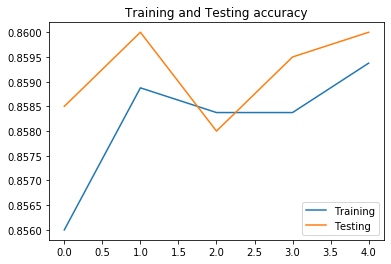

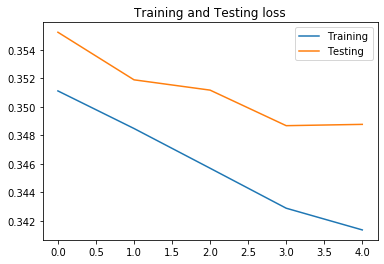

In [23]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # NBR OF EPOCHS


plt.plot  ( epochs,     acc ,label='Training')
plt.plot  ( epochs, val_acc,label='Testing' )
plt.title ('Training and Testing accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss , label='Training')
plt.plot  ( epochs, val_loss , label='Testing')
plt.title ('Training and Testing loss'   )
plt.legend()
plt.show()

In [24]:
checkpoint_path = "./training2/cp-{epoch:04d}.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                     monitor='val_loss', 
                                     verbose=0, 
                                     save_best_only=False,
                                     save_weights_only=True, 
                                     save_freq='epoch')

model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=3,
          verbose = 1,
         validation_data=(X_test_std, y_test),
         callbacks=[model_checkpoint_callback])



Epoch 1/3
63/63 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8599 - val_loss: 0.3464 - val_accuracy: 0.8605
Epoch 2/3
63/63 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8606 - val_loss: 0.3459 - val_accuracy: 0.8600
Epoch 3/3
63/63 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8606 - val_loss: 0.3447 - val_accuracy: 0.8585


In [25]:
model.load_weights("./training2/cp-{epoch:04d}.ckpt".format(epoch=2))

In [26]:
model.save('my_model.h5')

In [27]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [28]:
import datetime
new_model = tf.keras.models.load_model("./training3/cp-{epoch:04d}.ckpt".format(epoch=2))
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

%load_ext tensorboard
!rm -rf ./logs/

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1)
                                                      

'rm' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [29]:
new_model.fit(X_train_std,
          y_train,
          batch_size=256, 
          epochs=10,
          verbose = 2,
         validation_data=(X_test_std, y_test),
         callbacks=[model_checkpoint_callback, tensorboard_callback])

Epoch 1/10
32/32 - 1s - loss: 0.3321 - accuracy: 0.8641 - val_loss: 0.3414 - val_accuracy: 0.8580
Epoch 2/10
32/32 - 0s - loss: 0.3307 - accuracy: 0.8651 - val_loss: 0.3411 - val_accuracy: 0.8580
Epoch 3/10
32/32 - 0s - loss: 0.3303 - accuracy: 0.8636 - val_loss: 0.3403 - val_accuracy: 0.8590
Epoch 4/10
32/32 - 0s - loss: 0.3296 - accuracy: 0.8644 - val_loss: 0.3404 - val_accuracy: 0.8580
Epoch 5/10
32/32 - 0s - loss: 0.3293 - accuracy: 0.8640 - val_loss: 0.3400 - val_accuracy: 0.8590
Epoch 6/10
32/32 - 0s - loss: 0.3290 - accuracy: 0.8640 - val_loss: 0.3406 - val_accuracy: 0.8585
Epoch 7/10
32/32 - 0s - loss: 0.3286 - accuracy: 0.8661 - val_loss: 0.3402 - val_accuracy: 0.8590
Epoch 8/10
32/32 - 0s - loss: 0.3282 - accuracy: 0.8655 - val_loss: 0.3399 - val_accuracy: 0.8580
Epoch 9/10
32/32 - 0s - loss: 0.3275 - accuracy: 0.8654 - val_loss: 0.3399 - val_accuracy: 0.8575
Epoch 10/10
32/32 - 0s - loss: 0.3274 - accuracy: 0.8661 - val_loss: 0.3397 - val_accuracy: 0.8575


In [30]:
checkpoint_path = "./training3/cp-{epoch:04d}.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                     monitor='val_loss', 
                                     verbose=0, 
                                     save_best_only=False,
                                     save_weights_only=False, 
                                     save_freq='epoch')

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=3,
          verbose = 1,
         validation_data=(X_test_std, y_test),
         callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)

Epoch 1/3
63/63 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8604 - val_loss: 0.3445 - val_accuracy: 0.8585
INFO:tensorflow:Assets written to: ./training3\cp-0001.ckpt\assets
Epoch 2/3
63/63 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8627 - val_loss: 0.3455 - val_accuracy: 0.8545
INFO:tensorflow:Assets written to: ./training3\cp-0002.ckpt\assets
Epoch 3/3
63/63 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8605 - val_loss: 0.3432 - val_accuracy: 0.8565
INFO:tensorflow:Assets written to: ./training3\cp-0003.ckpt\assets


In [31]:
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,
         validation_data=(X_test_std, y_test),
         callbacks=[model_checkpoint_callback, tensorboard_callback])

Epoch 1/10
63/63 [==============================] - 0s 8ms/step - loss: 0.3329 - accuracy: 0.8627 - val_loss: 0.3420 - val_accuracy: 0.8565
INFO:tensorflow:Assets written to: ./training3\cp-0001.ckpt\assets
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8661 - val_loss: 0.3427 - val_accuracy: 0.8560
INFO:tensorflow:Assets written to: ./training3\cp-0002.ckpt\assets
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8655 - val_loss: 0.3425 - val_accuracy: 0.8570
INFO:tensorflow:Assets written to: ./training3\cp-0003.ckpt\assets
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8641 - val_loss: 0.3414 - val_accuracy: 0.8590
INFO:tensorflow:Assets written to: ./training3\cp-0004.ckpt\assets
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8644 - val_loss: 0.3413 - val_accuracy: 0.8580
INFO:tensorflow:Assets written t

In [32]:
# make a prediction
y_predict = model.predict_classes(X_test_std)
x = pd.DataFrame(y_test).copy()
x.reset_index(drop=True, inplace=True) 
x["Predicted"] = pd.DataFrame(y_predict)

In [33]:
#Prediction for first Model
x

,Exited,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,0
1996,0,0
1997,0,0
1998,0,0


Text(0.5, 24.0, 'Predicted label (model 1)')

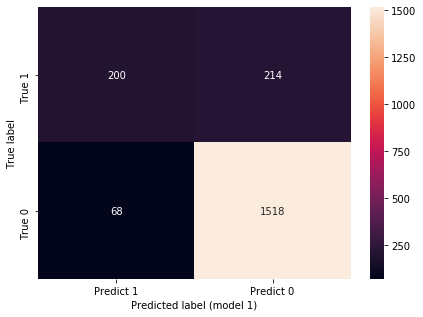

In [34]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label (model 1)')

In [35]:
loss, acc = model.evaluate(X_test_std,  y_test, verbose=1)
loss2, acc2 = model.evaluate(X_train_std,  y_train, verbose=1)

print('\nTesting accuracy for model 1: {:5.2f}%'.format(100*acc))

print('\nTraining accuracy for model 1: {:5.2f}%'.format(100*acc2))

250/250 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8700

Testing accuracy for model 1: 85.90%

Training accuracy for model 1: 87.00%


In [36]:
# make a prediction for model 2
y_predict2 = new_model.predict_classes(X_test_std)
x2 = pd.DataFrame(y_test).copy()
x2.reset_index(drop=True, inplace=True) 
x2["Predicted"] = pd.DataFrame(y_predict2)

In [37]:
loss, acc = new_model.evaluate(X_test_std,  y_test, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

63/63 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8575
Restored model, accuracy: 85.75%


In [38]:
x2

,Exited,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,0
1996,0,0
1997,0,0
1998,0,0


Text(0.5, 24.0, 'Predicted label (model 2)')

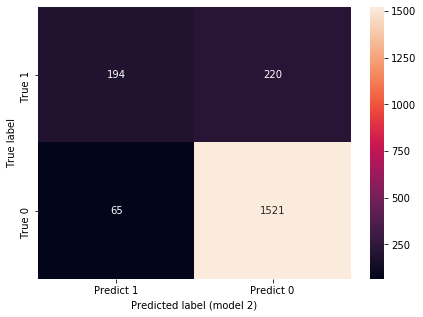

In [39]:
cm=metrics.confusion_matrix(y_test, y_predict2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label (model 2)')

In [40]:
loss, acc = new_model.evaluate(X_test_std,  y_test, verbose=1)
loss2, acc2 = new_model.evaluate(X_train_std,  y_train, verbose=1)

print('\nTesting accuracy for model 2: {:5.2f}%'.format(100*acc))

print('\nTraining accuracy for model 2: {:5.2f}%'.format(100*acc2))

250/250 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8660

Testing accuracy for model 2: 85.75%

Training accuracy for model 2: 86.60%
